In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER, JOURNAL_MAP

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

# existing vs non-existent
df_existing = df_generated[df_generated["Exists"] == 1.0]
df_non_existent = df_generated[df_generated["Exists"] == 0.0]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_31210/2153734850.py:18: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [3]:
# additional computations

number_of_references_per_field = df_generated.groupby("top_field").size()

# existence rate
references_existence_rate_per_field = df_generated.groupby(
    "top_field"
)["Exists"].mean()

# reorder
number_of_references_per_field = number_of_references_per_field[ORDER]
references_existence_rate_per_field = references_existence_rate_per_field[ORDER]

# convergence plot
average_existence_rates = dict.fromkeys(ORDER)

for k, v in average_existence_rates.items():
    existence_rate = []
    for i in range(100):
        sampled_ids = df_sample[
            df_sample["top_field"] == k
        ]["PaperID"].sample(15, random_state=i)

        existence_rate.append(
            df_generated[
                df_generated["id"].isin(sampled_ids)
            ].Exists.mean()
        )
        
    average_existence_rates[k] = existence_rate

convergence_rates = pd.DataFrame(
    average_existence_rates
).melt(var_name='Category', value_name='Values')
convergence_rates['Category'] = pd.Categorical(convergence_rates['Category'], categories=ORDER, ordered=True)
convergence_rates = convergence_rates.sort_values(by='Category')


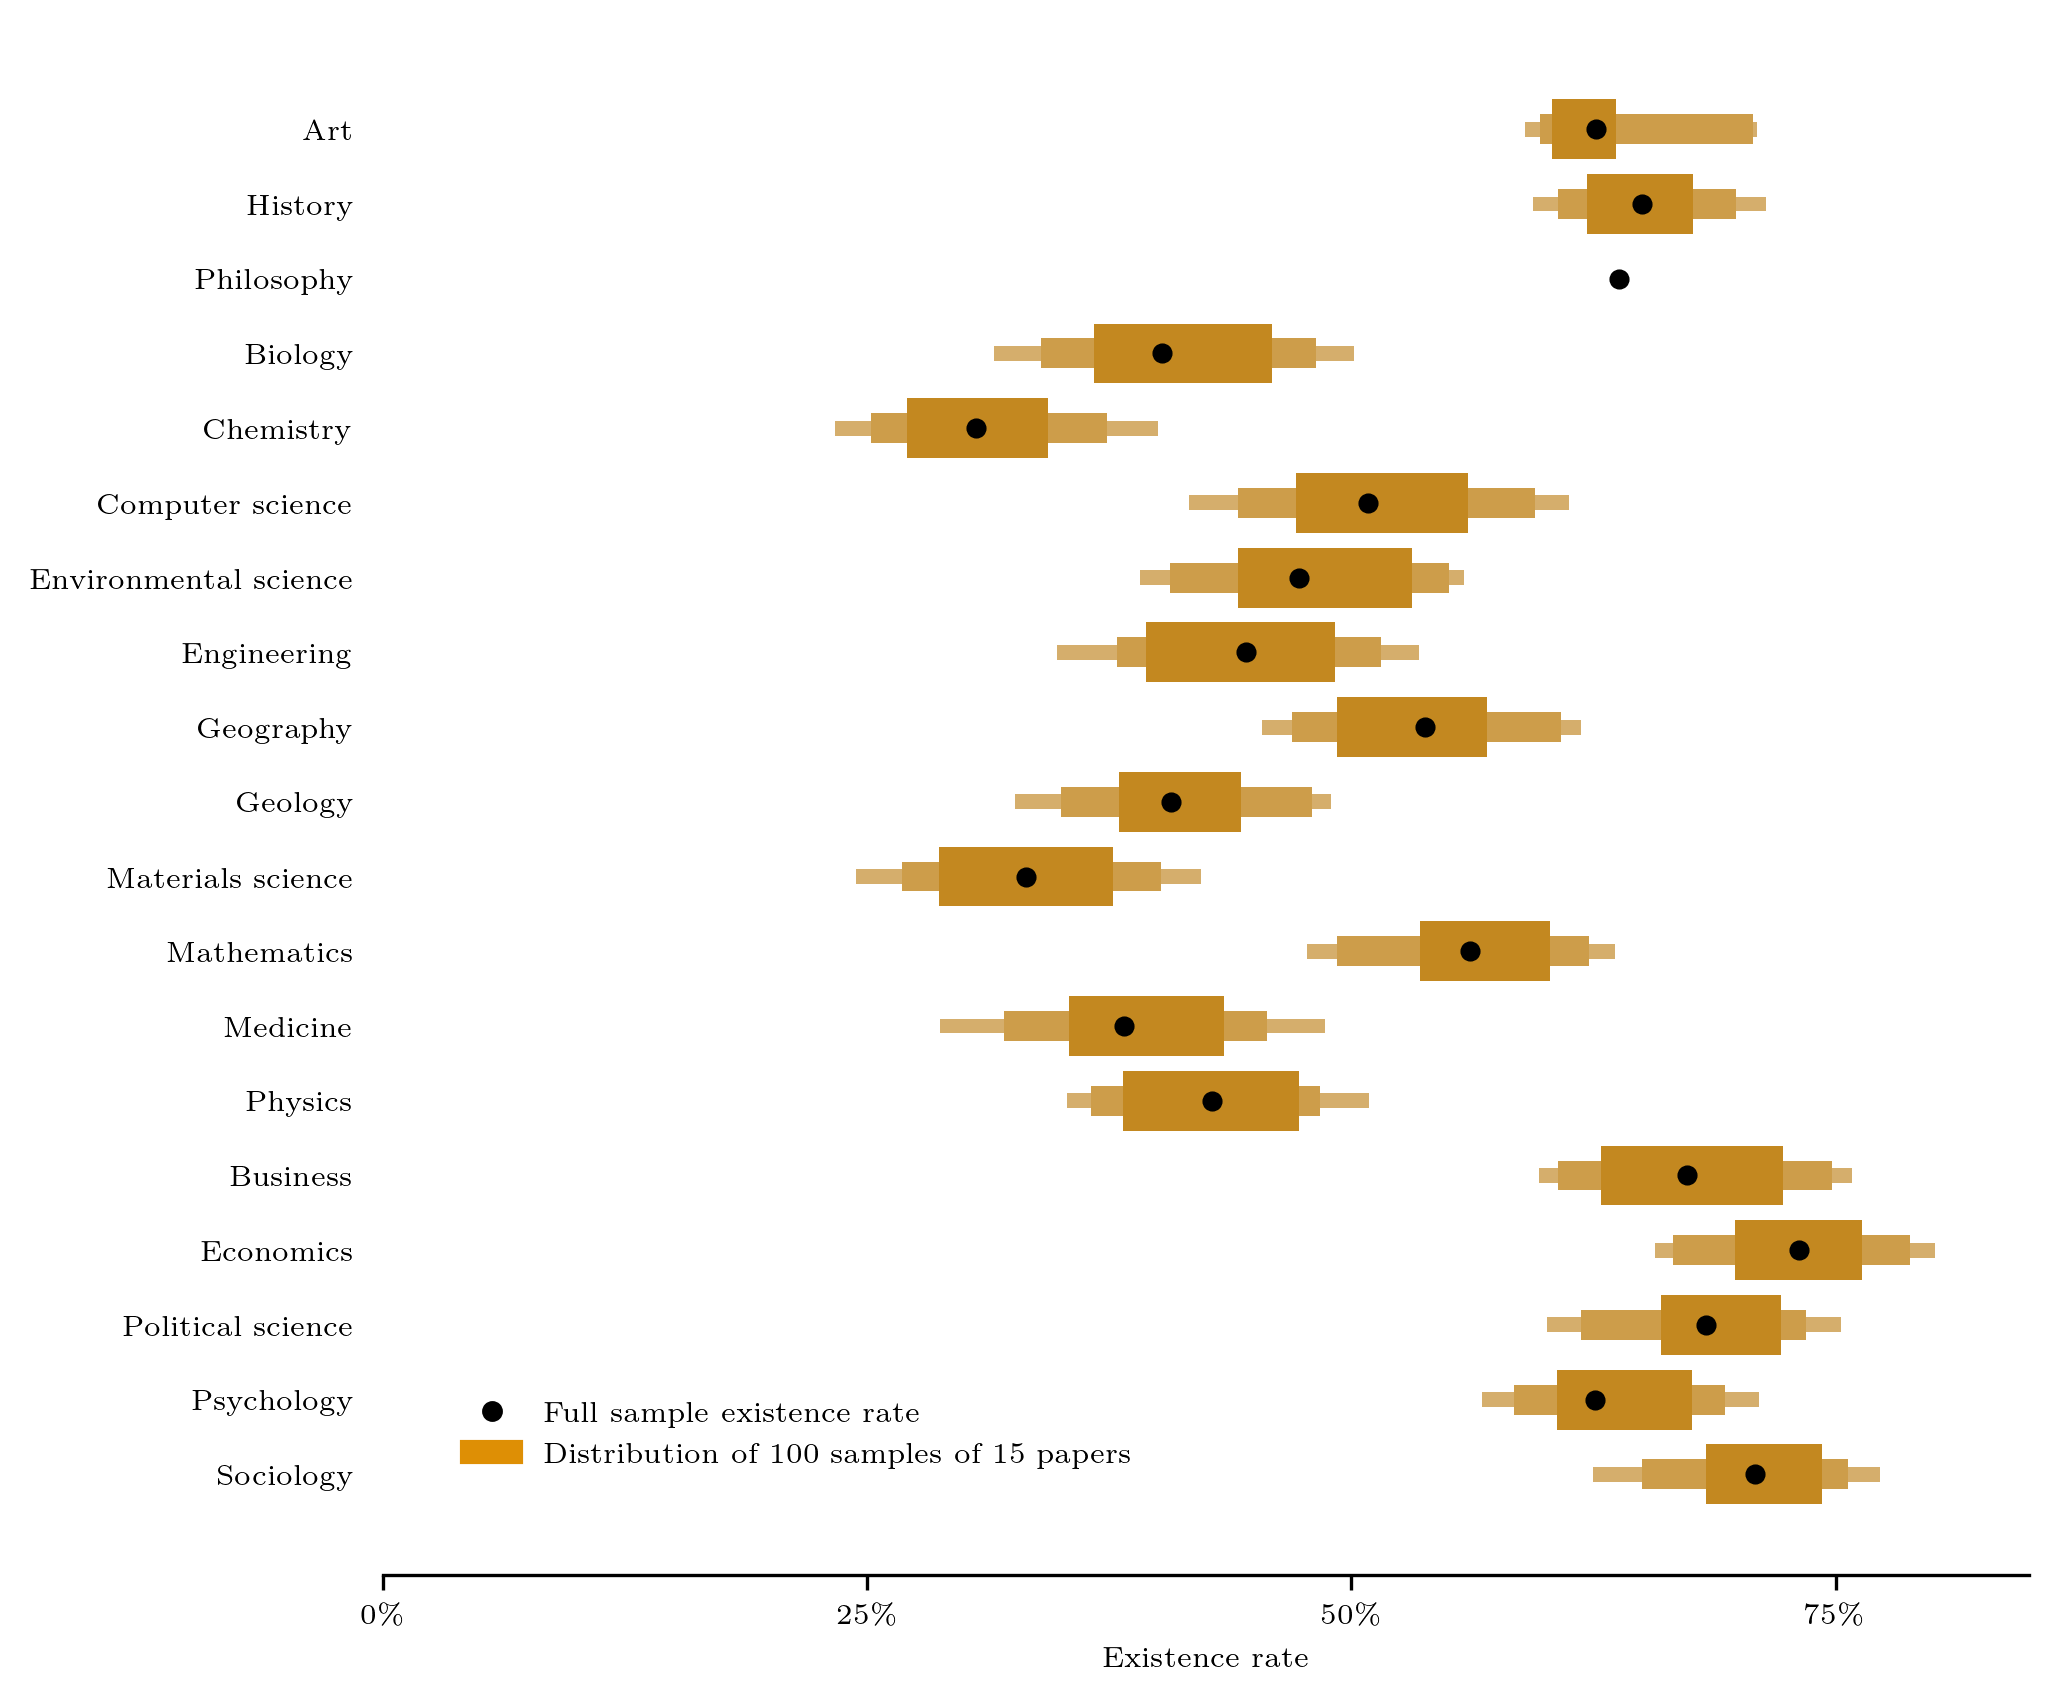

In [8]:
## Figure 2
Figure2, ax2 = plt.subplot_mosaic(
    [
        ['A'],
    ],
    figsize=(7.08,6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.1, 'hspace': 0.45},
    # sharey=True,
)

sns.boxenplot(
    data=convergence_rates,
    x='Values',
    y='Category',
    color="#de8f05",
    edgecolor=None,
    linecolor=None,
    linewidth=0,
    showfliers=False,
    ax=ax2["A"],
)

# make it a black star
sns.scatterplot(
    x=references_existence_rate_per_field.values,
    y=references_existence_rate_per_field.index,
    color='black',
    s=20,
    edgecolor=None,
    ax=ax2["A"],
)

ax2["A"].tick_params(left=False)

ax2["A"].set_xlabel("Existence rate", fontsize=7)
ax2["A"].set(xlim=(0, 0.85))
ax2["A"].set_ylabel("", fontsize=7)
ax2["A"].set_yticks(
    ticks=list(range(references_existence_rate_per_field.index.size)),
)
ax2["A"].set_yticklabels(
    labels=[
        r"\scriptsize{" + i + "}" for i in references_existence_rate_per_field.index
    ],
    fontsize=7,
)
ax2["A"].set_xticks(
    [0,0.25,0.50,0.75],
    labels=[r"0$\%$",r"25$\%$",r"50$\%$",r"75$\%$"],
    fontsize=7,
)
ax2["A"].set_title("")
ax2["A"].grid(False)

sns.despine(ax=ax2["A"],left=True, bottom=False)

# create legend, should be black dot and orange box
legend_elements = [
    mlines.Line2D(
        [], [], color='black', marker='o', linestyle='None', markersize=4,
        label='Full sample existence rate'
    ),
    Patch(
        facecolor='#de8f05', edgecolor='#de8f05',
        label='Distribution of 100 samples of 15 papers'
    ),
]

ax2["A"].legend(
    handles=legend_elements,
    loc='lower left',
    title='',
    title_fontsize=7,
    fontsize=7,
    frameon=False,
    bbox_transform=Figure2.transFigure,
    bbox_to_anchor=(0.15, 0.15),
)